# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [1]:
# Let's get started importing the necessary libraries
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


In [2]:
# Loading the data
df = pd.read_csv('ames_train.csv')
#df

In [3]:
# Investigate the Data
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Investigation continued
#Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
display(df['SalePrice'].describe())
display(df['LotArea'].describe())
display(df['OverallQual'].describe())
display(df['OverallCond'].describe())
display(df['YearBuilt'].describe())
display(df['TotalBsmtSF'].describe())
display(df['GrLivArea'].describe())
display(df['Neighborhood'].value_counts())
display(df['Neighborhood'].value_counts().describe())
display(df['Condition1'].value_counts())
display(df['Condition1'].value_counts().describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

count     25.000000
mean      58.400000
std       50.173034
min        2.000000
25%       25.000000
50%       49.000000
75%       77.000000
max      225.000000
Name: Neighborhood, dtype: float64

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

count       9.000000
mean      162.222222
std       412.442656
min         2.000000
25%         8.000000
50%        19.000000
75%        48.000000
max      1260.000000
Name: Condition1, dtype: float64

In [5]:
#Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations. 
#Explain why you used the chosen subsets and do this for three possible 2-way splits. 
#I'm not entirely clear on the instruction here, so I will do some different "2-way splits" in this cell and below

#df.loc[df['alcohol'] < 12, ['color_intensity']]
#df.loc[df['color_intensity'] > 7, 'shade'] = 'dark'

#df['Num_Lines'] = df['linename'].map(lambda a: len(a))
#df['Res'] = df['MSZoning'].map(lambda a: "R" in a)
#df['Res']['False']


#df.loc[df['TotalBsmtSF'] > 0, 'HasBasement'] = True
#display(df['HasBasement'].describe())

#for buyers who do or don't want a basement, this is a useful split to make.
df['HasBasement2'] = df['TotalBsmtSF'].map(lambda a: a>0)
df_basement = df.loc[df['HasBasement2'] == True]
df_no_basement = df.loc[df['HasBasement2'] == False]

  
#For mobility-restricted buyers, having an upper floor is undesirable, so we can split the set on having a second story
df['HasUpstairs'] = df['2ndFlrSF'].map(lambda a: a>0)
df_upstairs = df.loc[df['HasUpstairs'] == True]
df_no_upstairs = df.loc[df['HasUpstairs'] == False]


#Because sometime during 1978, lead paint was effectively banned, homes built before or during 1978 have a higher 
#likelihood of having lead paint than those built after.  This is sometimes a point of concern for home buyers
df['lead_paint_le_1978'] = df['YearBuilt'].map(lambda a: a <= 1978)
df_lead_risk = df.loc[df['lead_paint_le_1978'] == True]
df_lead_safe = df.loc[df['lead_paint_le_1978'] == False]


##df.loc[df['MSZoning'].__contains__('R'), ['Residential']]## 

In [30]:
#Investigation continued 3
#Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations. 
#Explain why you used the chosen subsets and do this for three possible 2-way splits. 
#State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
df_Area_Price = df.loc[:,['GrLivArea', 'SalePrice']]
display(df_Area_Price.corr())
#Price is a metric of interest to many stakeholders.  
#I expect there to be some correlation in this set, since price tends to increase with living area square footage.
#Centrality for grlivarea should be lower than saleprice; similarly for dispersion, since saleprices in general are 
#higher than squarefootage... although perhaps after normalization, i could be wrong about dispersion.

df_Year_Cond = df.loc[:,['YearBuilt','OverallCond']]
display(df_Year_Cond.corr())
#Older houses can often have more wear and tear, but also can be desirable due to their style/craft, or renovation
#I think this may be an interesting slice to take which may show some substantial dispersion relating to having been
#renovated or not.  I expect build year to be more uniform.  Condition will have more dispersion, I predict (after normalization)!

df_Lot_Qual = df.loc[:,['LotArea','OverallQual']]
display(df_Lot_Qual.corr())
#This could be interesting to explore.  There may be some correlation between the lot size and the quality of construction,
#though I'm not sure.  I think centrality/dispersion here will be smaller for quality because of a skew toward
#high values - looking at the quantiles, there aren't many low quality homes.  

#I chose to do a fourth set too.
df_nbr_price = df.loc[:,['Neighborhood','SalePrice','Condition1']]

#Neighborhood is often related to saleprice, and I was curious about proximity to railroad tracks.  I wanted to track
#a few categorical data columns as well.  I believe the dispersion here will be more significant for Condition1 than Neighborhood
#I actually lived in Ames for 3 years, so I remember the noise of the railroads!!!





,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


,YearBuilt,OverallCond
YearBuilt,1.000000,-0.375983
OverallCond,-0.375983,1.000000


,LotArea,OverallQual
LotArea,1.000000,0.105806
OverallQual,0.105806,1.000000


<IPython.core.display.Javascript object>


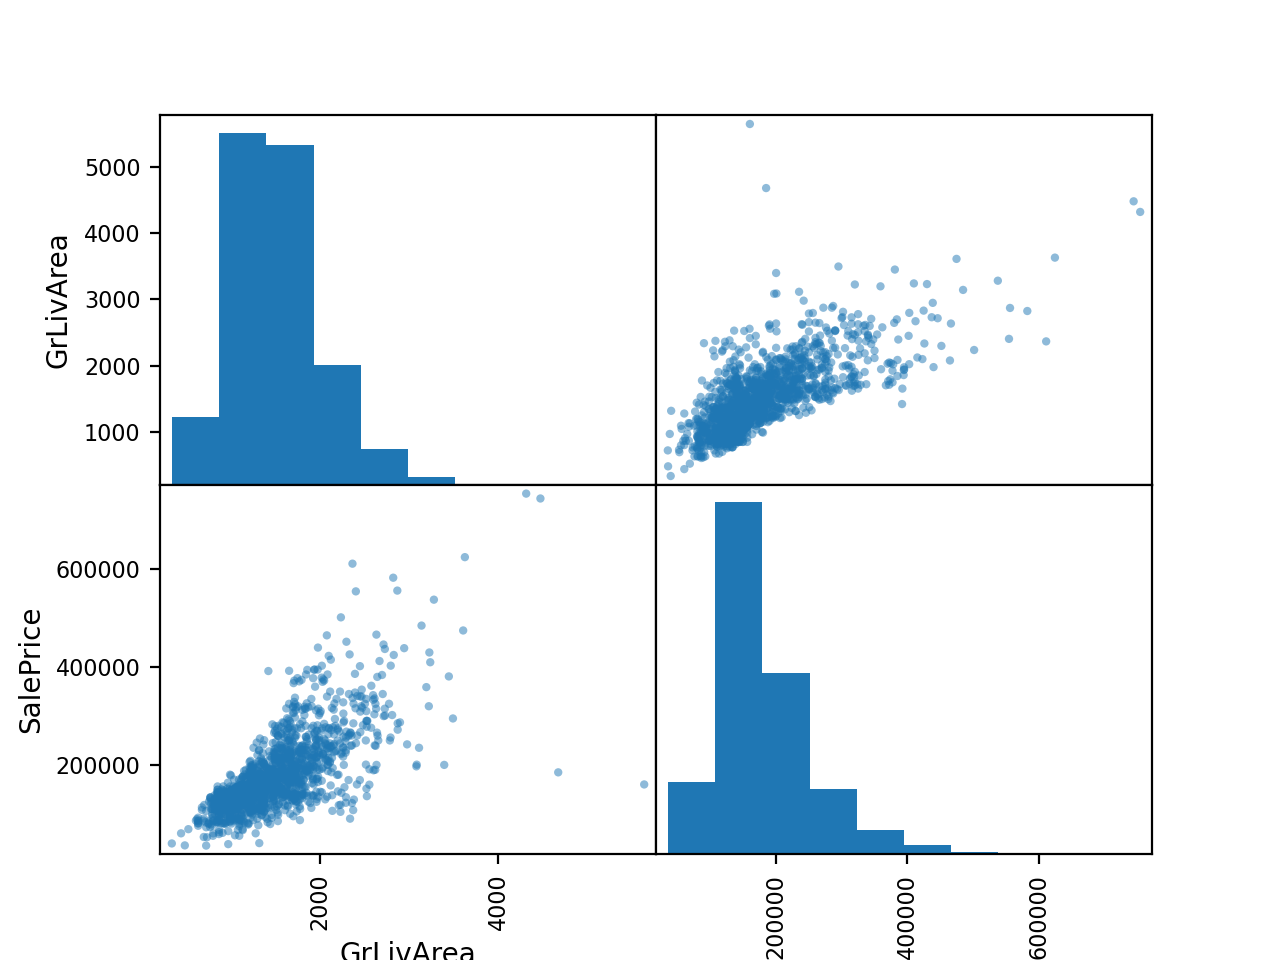

<IPython.core.display.Javascript object>


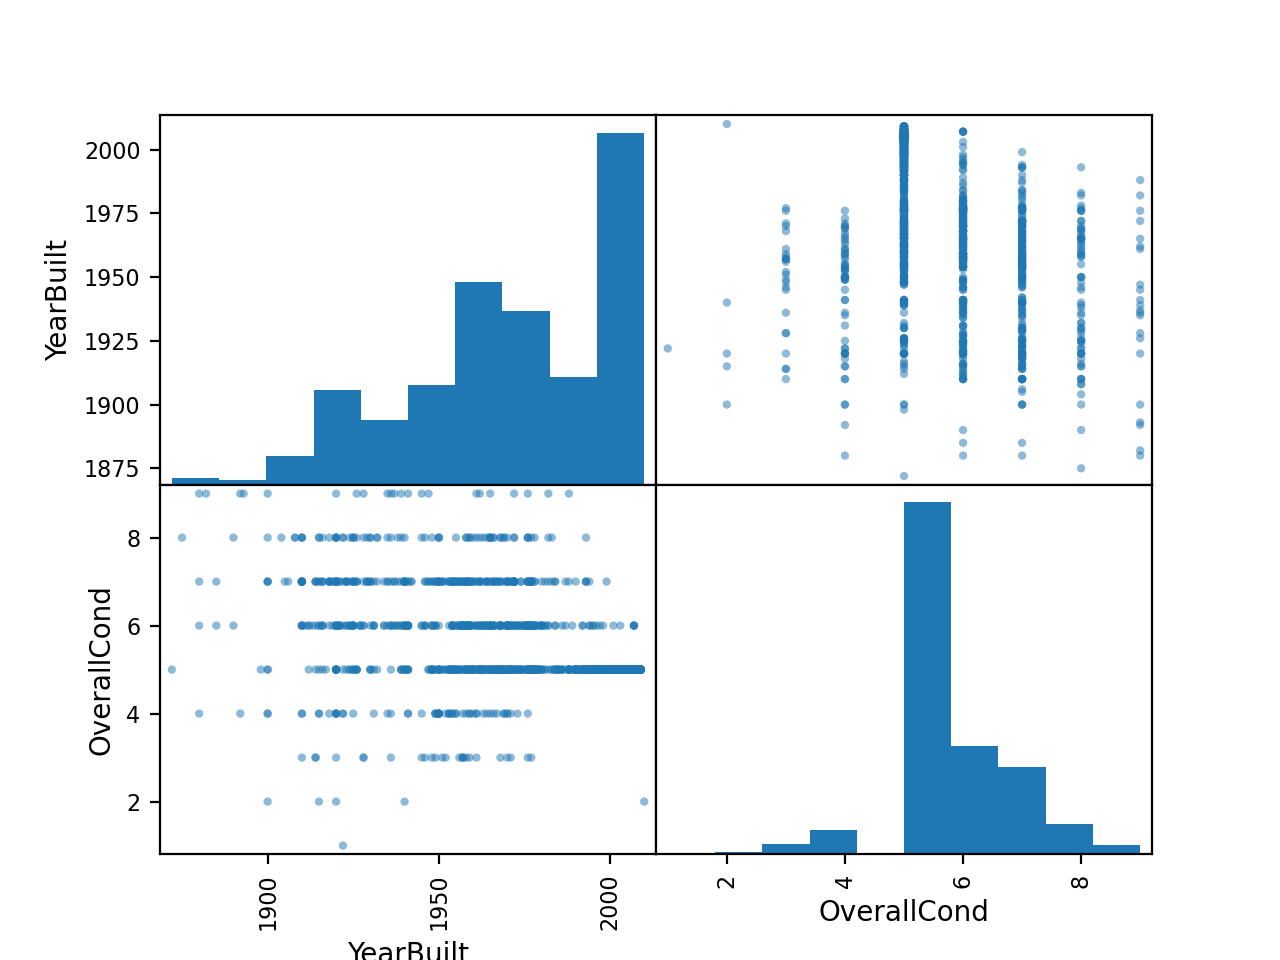

<IPython.core.display.Javascript object>


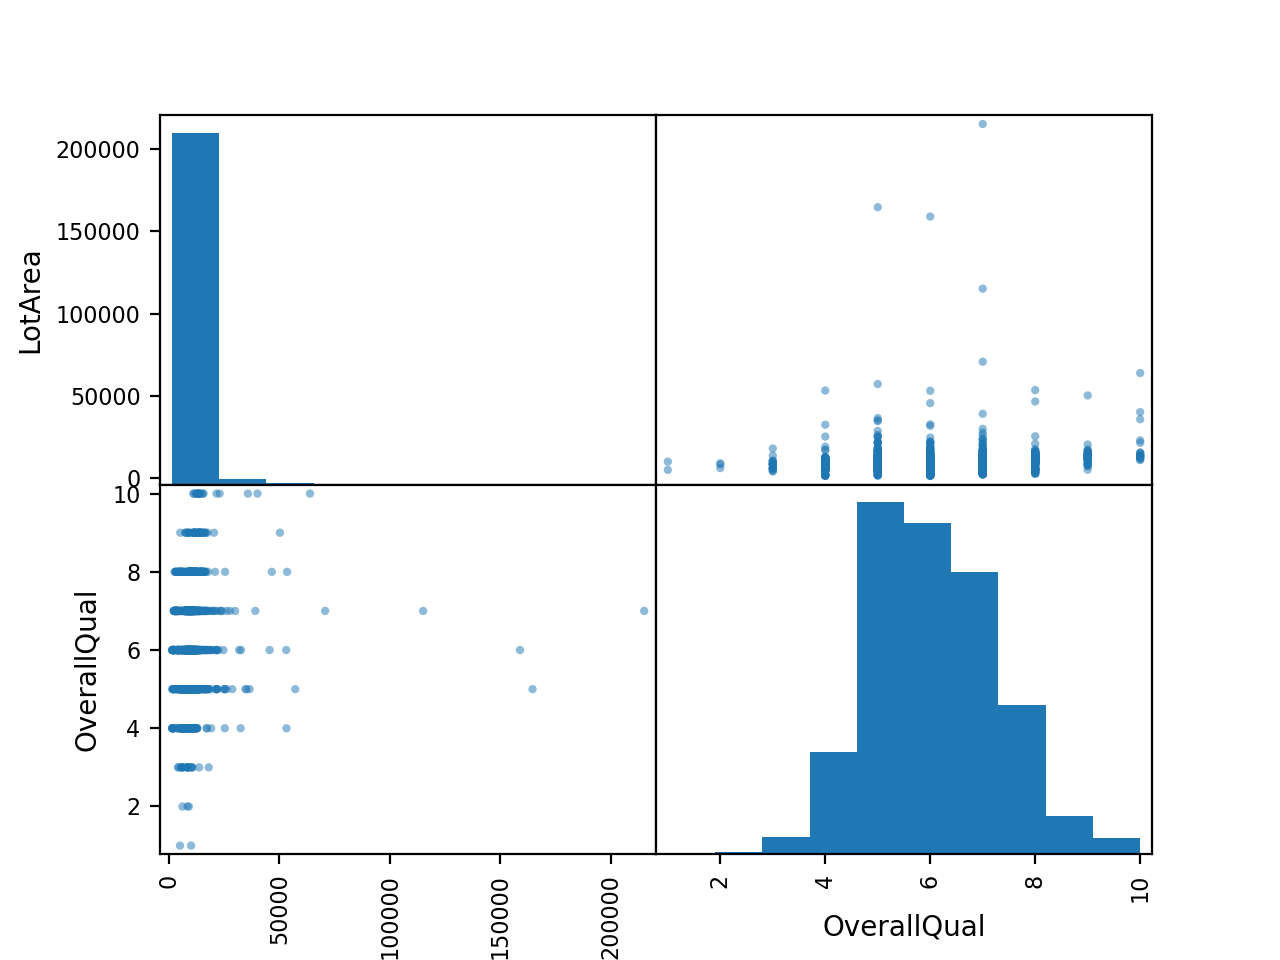

<IPython.core.display.Javascript object>


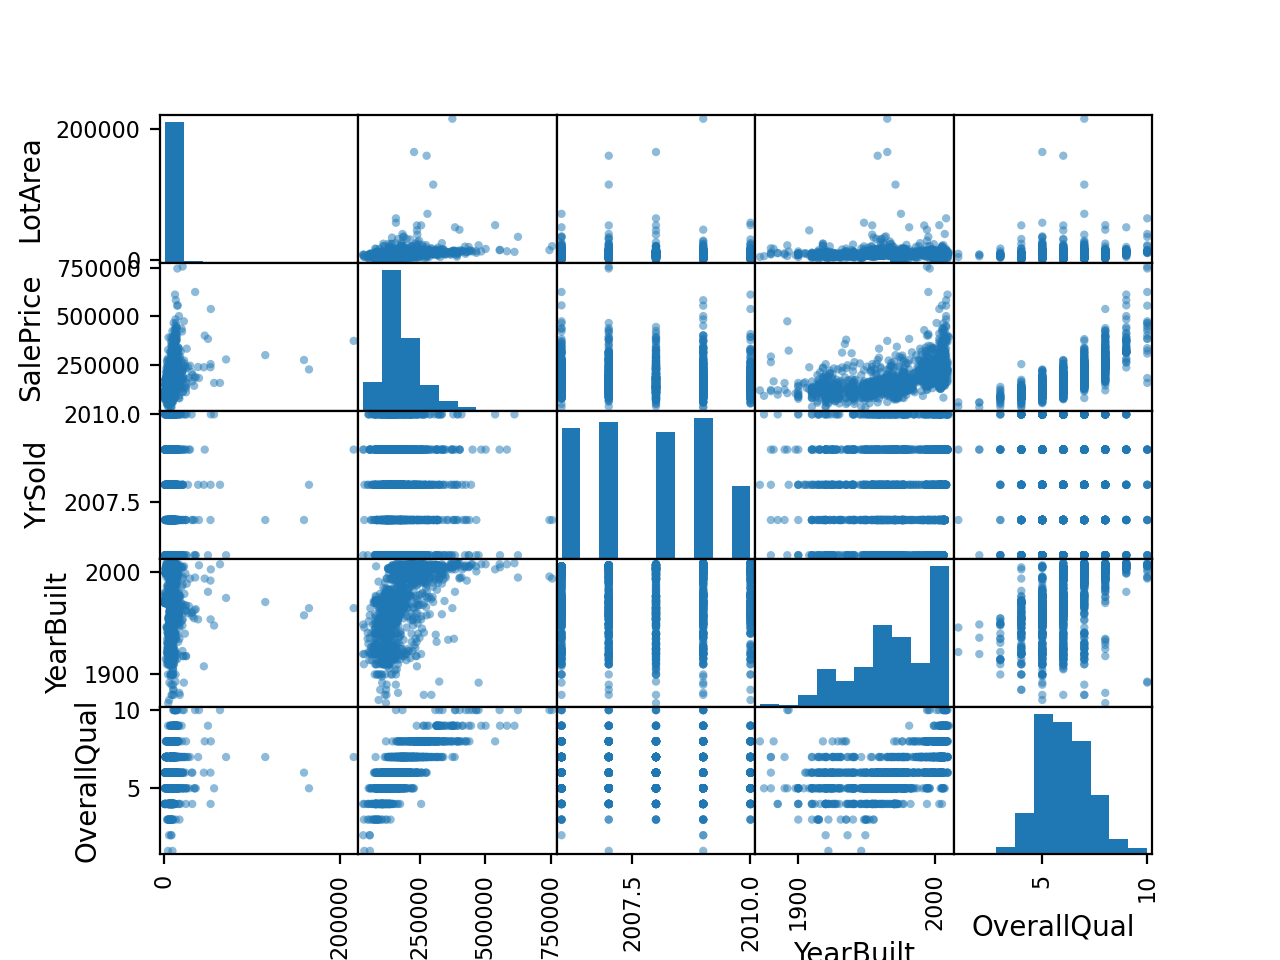

Neighborhood  SalePrice  Condition1
NAmes         140000     Norm          6
              135000     Norm          6
              110000     Norm          5
              139000     Norm          5
CollgCr       230000     Norm          4
                                      ..
NridgHt       309000     Norm          1
              314813     Norm          1
              315000     Norm          1
              317000     Norm          1
Blmngtn       159895     Norm          1
Length: 1277, dtype: int64

In [31]:
# Investigating Distributions using scatter_matrix


 
data = df_Lot_Qual


pd.plotting.scatter_matrix(df_Area_Price);
pd.plotting.scatter_matrix(df_Year_Cond);
pd.plotting.scatter_matrix(df_Lot_Qual);


#And just for fun, why not look at several things at once!
pd.plotting.scatter_matrix(df[['LotArea', 'SalePrice', 'YrSold', 'YearBuilt', 'OverallQual']])


display(df_nbr_price.value_counts())


<IPython.core.display.Javascript object>


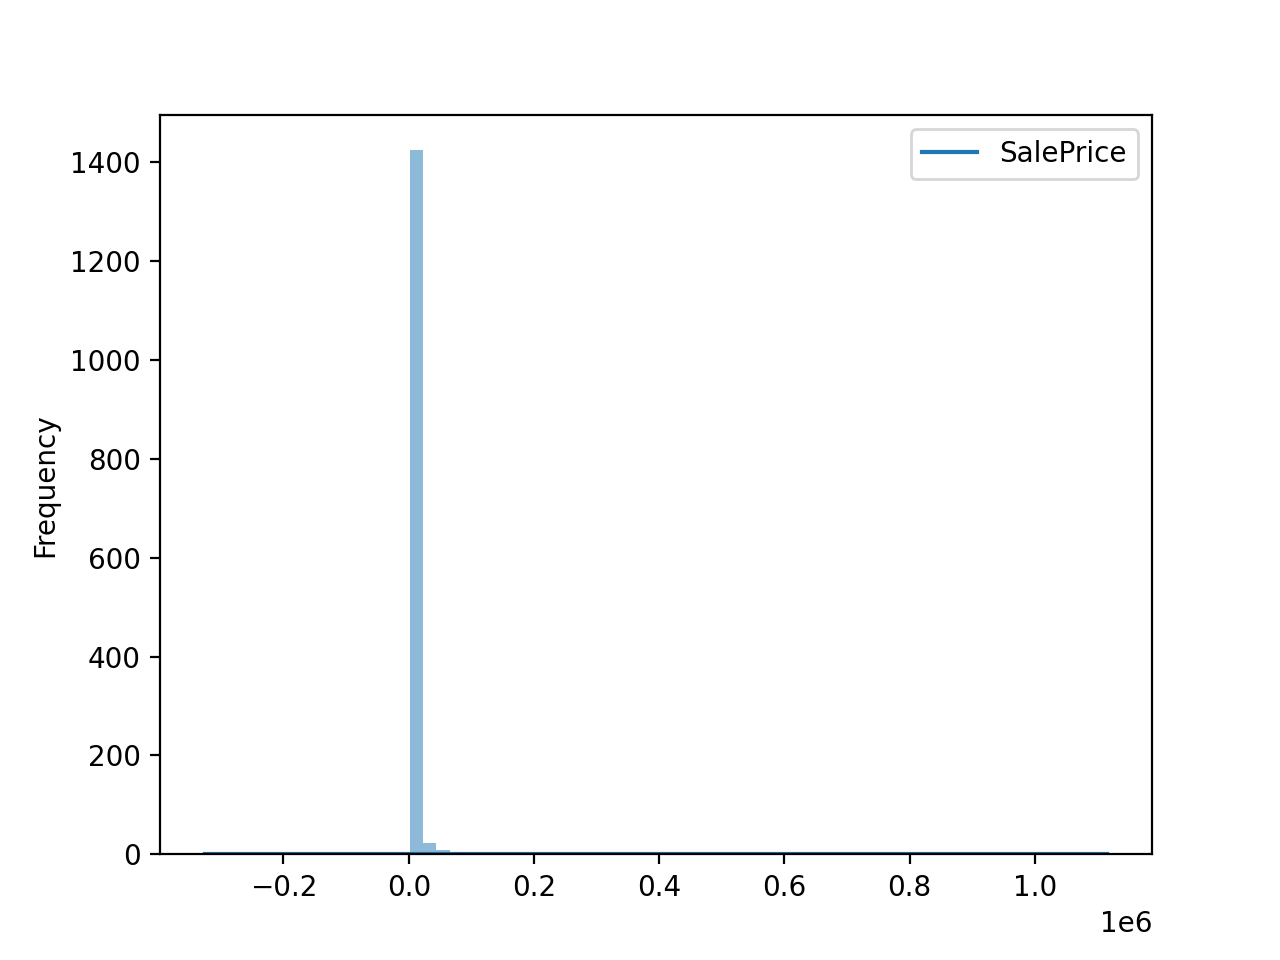

<AxesSubplot:ylabel='Density'>

In [13]:
# Create a plot that shows the SalesPrice Distribution
df_Sales_price = df.loc[:,'SalePrice']
df_Sales_price = pd.DataFrame(df_Sales_price)
#df_Sales_price.plot.hist(alpha = 0.5, subplots = True) #hist works as a measure of distribution too, but kde is more continuous
df_Sales_price.plot.kde()


<IPython.core.display.Javascript object>


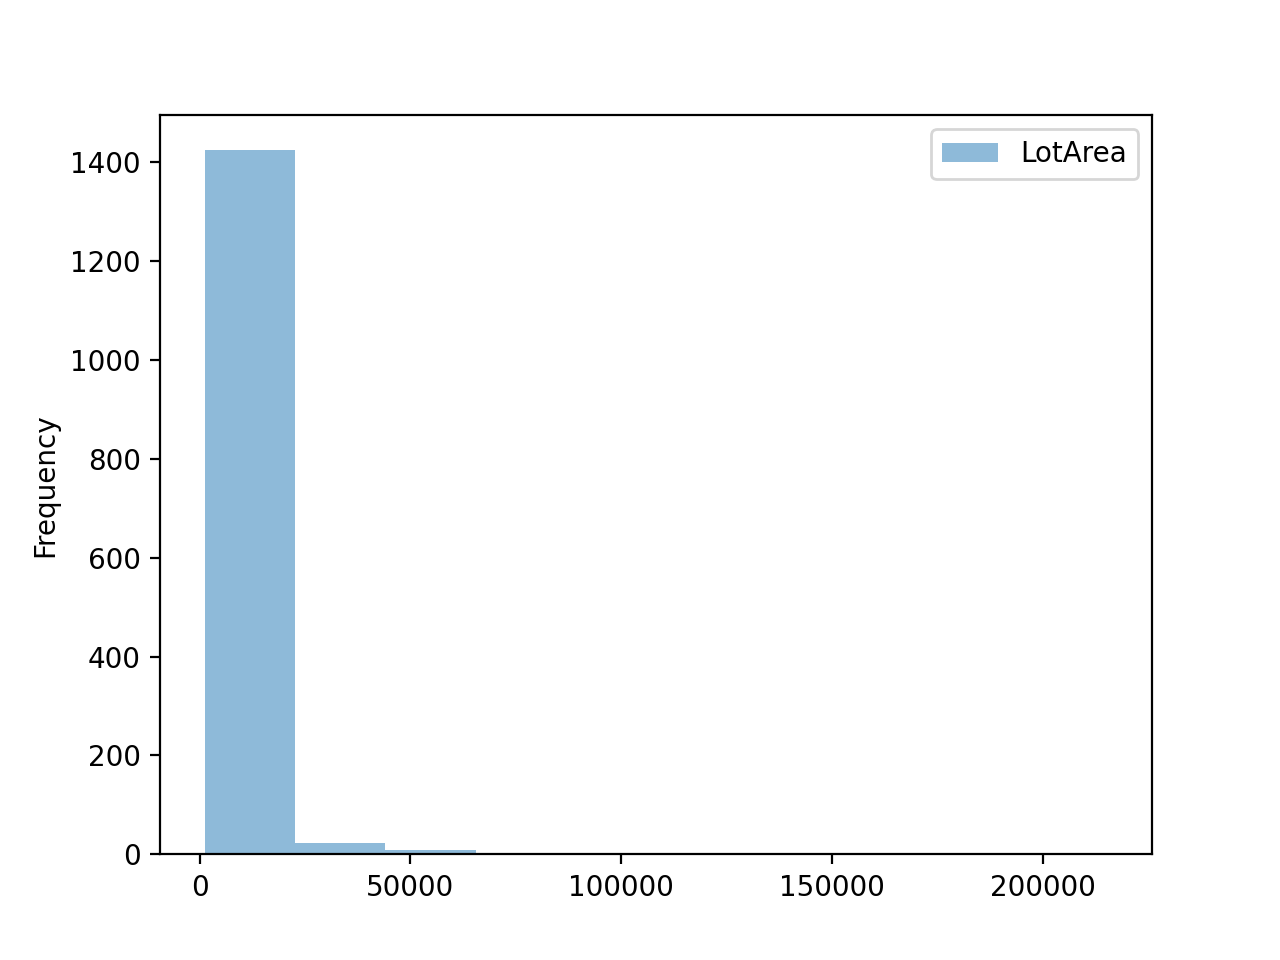

<IPython.core.display.Javascript object>


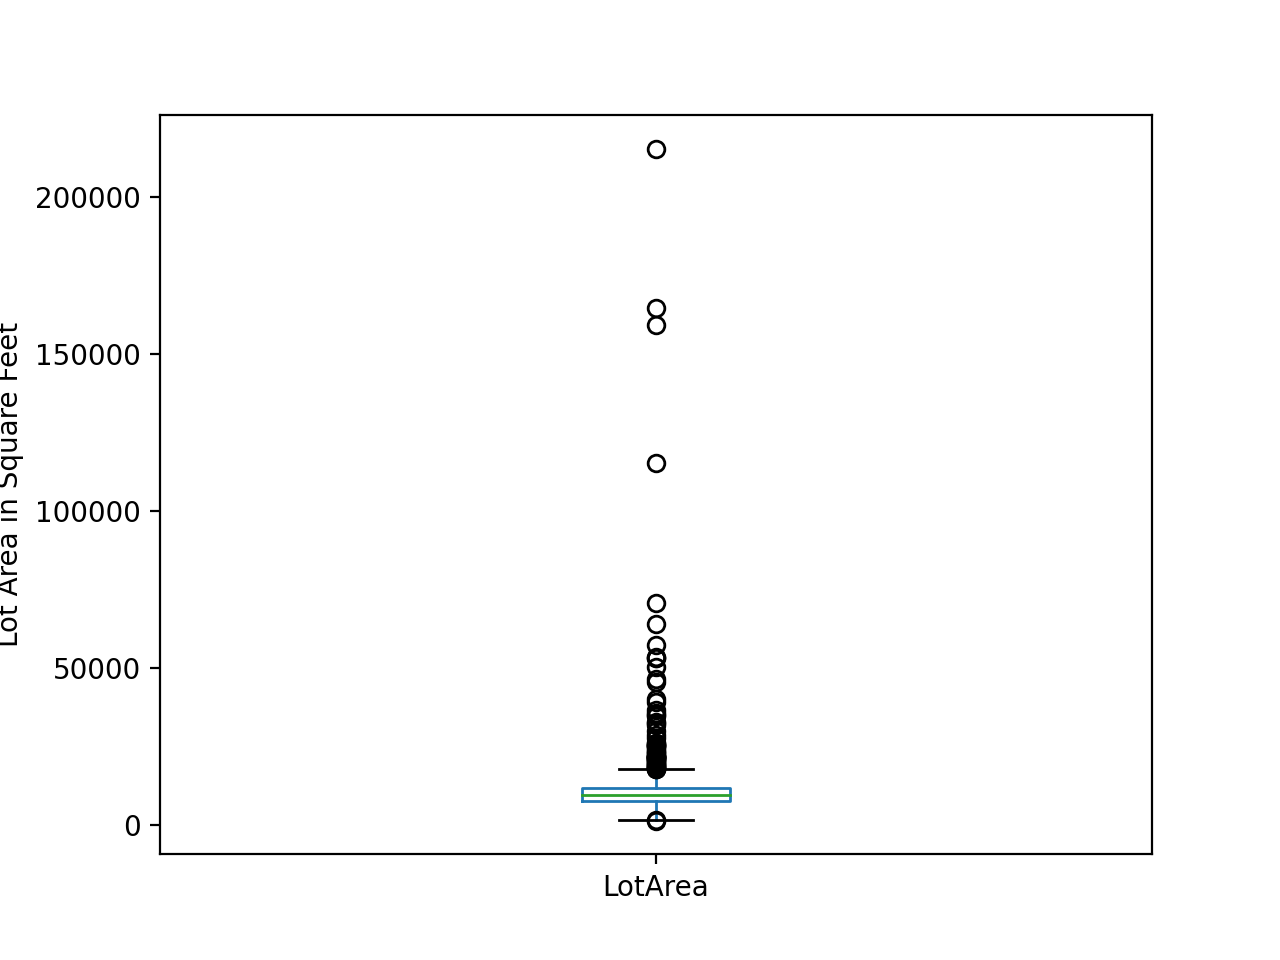

<IPython.core.display.Javascript object>


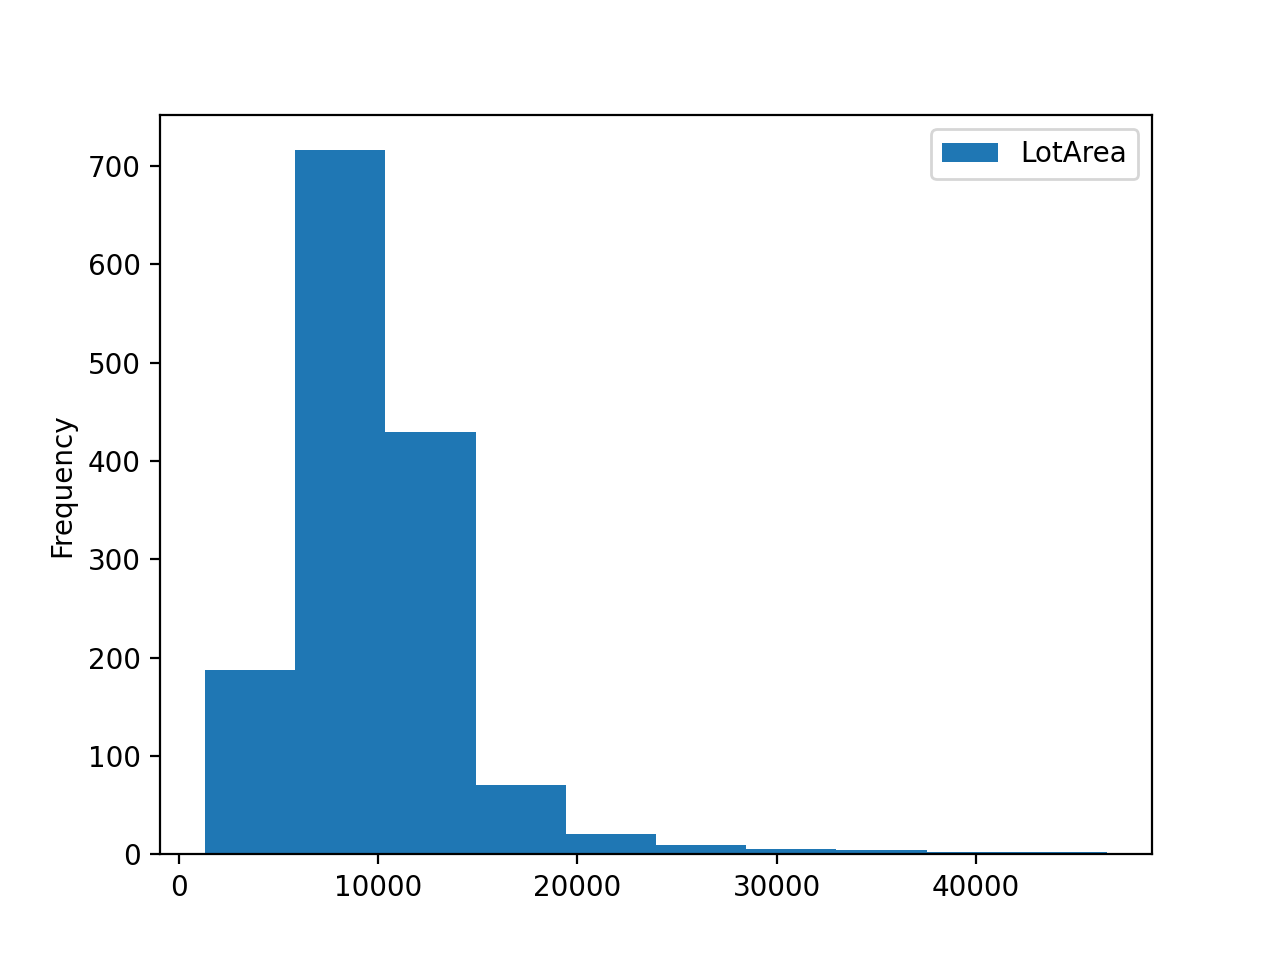

<IPython.core.display.Javascript object>


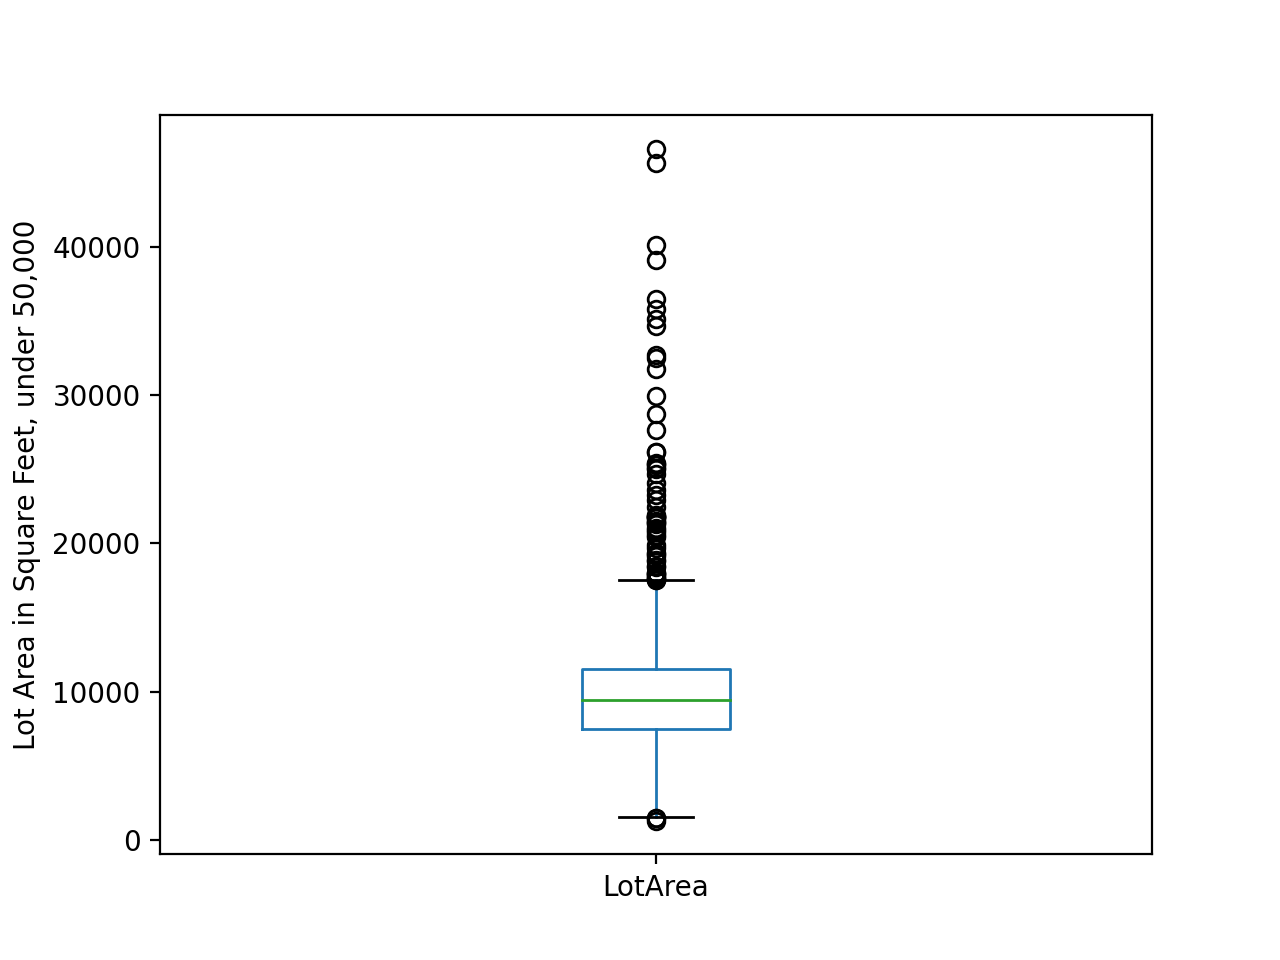

C:\Users\erict\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


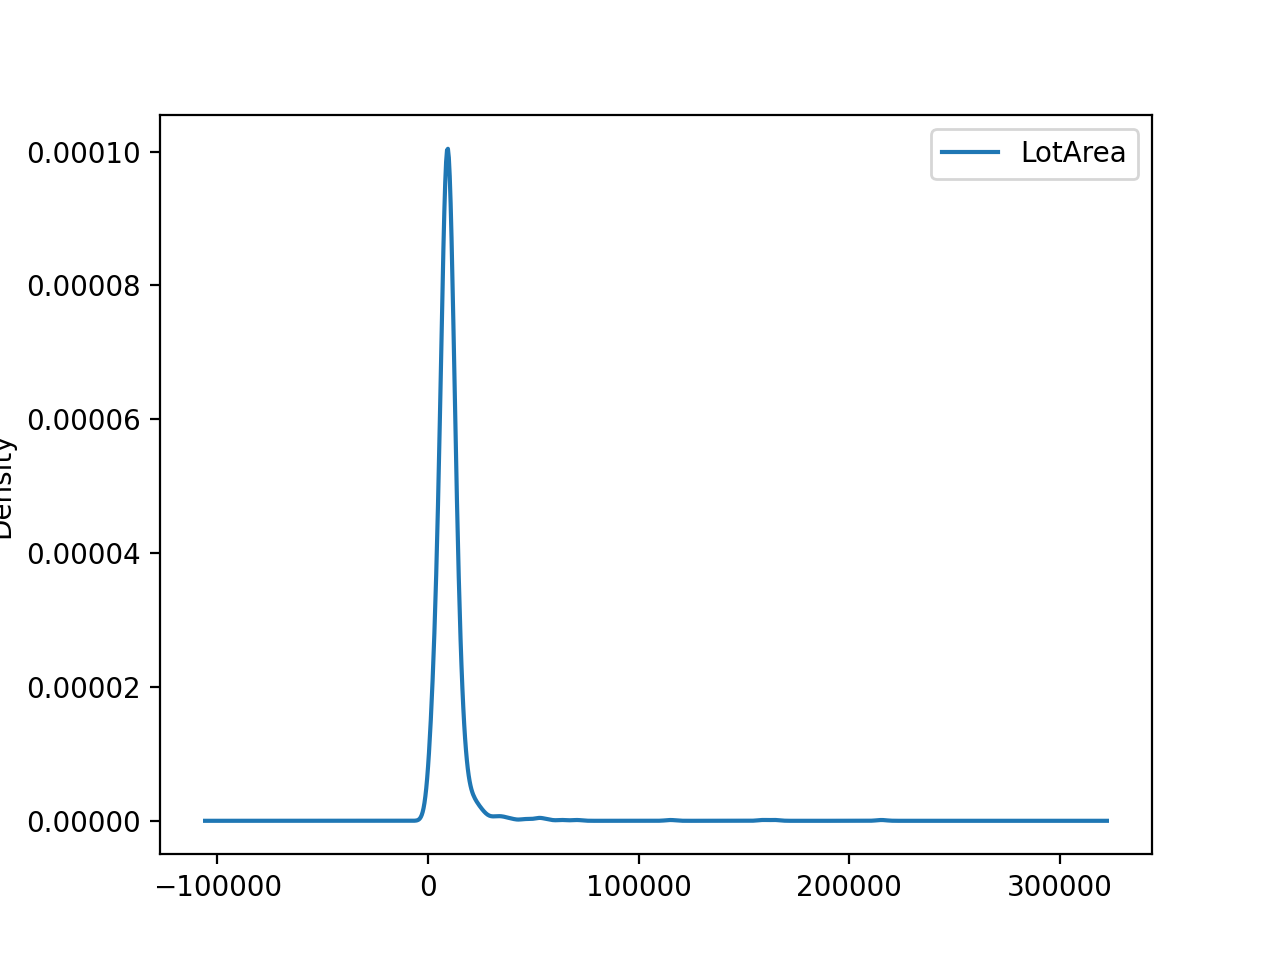

<AxesSubplot:ylabel='Density'>

In [18]:
# Create a plot that shows the LotArea Distribution
df[['LotArea']].plot.hist(alpha = 0.5, subplots = True)
#The initial histogram gets badly skewed/binned because of outliers.  Let's revisit that.
df[['LotArea']].plot.box(ylabel = 'Lot Area in Square Feet')
lot_area_remove_outliers = pd.DataFrame(df.loc[df['LotArea'] < 50000,'LotArea'])

lot_area_remove_outliers.plot.hist()
lot_area_remove_outliers.plot.box(ylabel = 'Lot Area in Square Feet, under 50,000', subplots = True);

#The previous plots show distribution pretty well, but kde is probably also worth looking at.
df[['LotArea']].plot.kde()

<IPython.core.display.Javascript object>


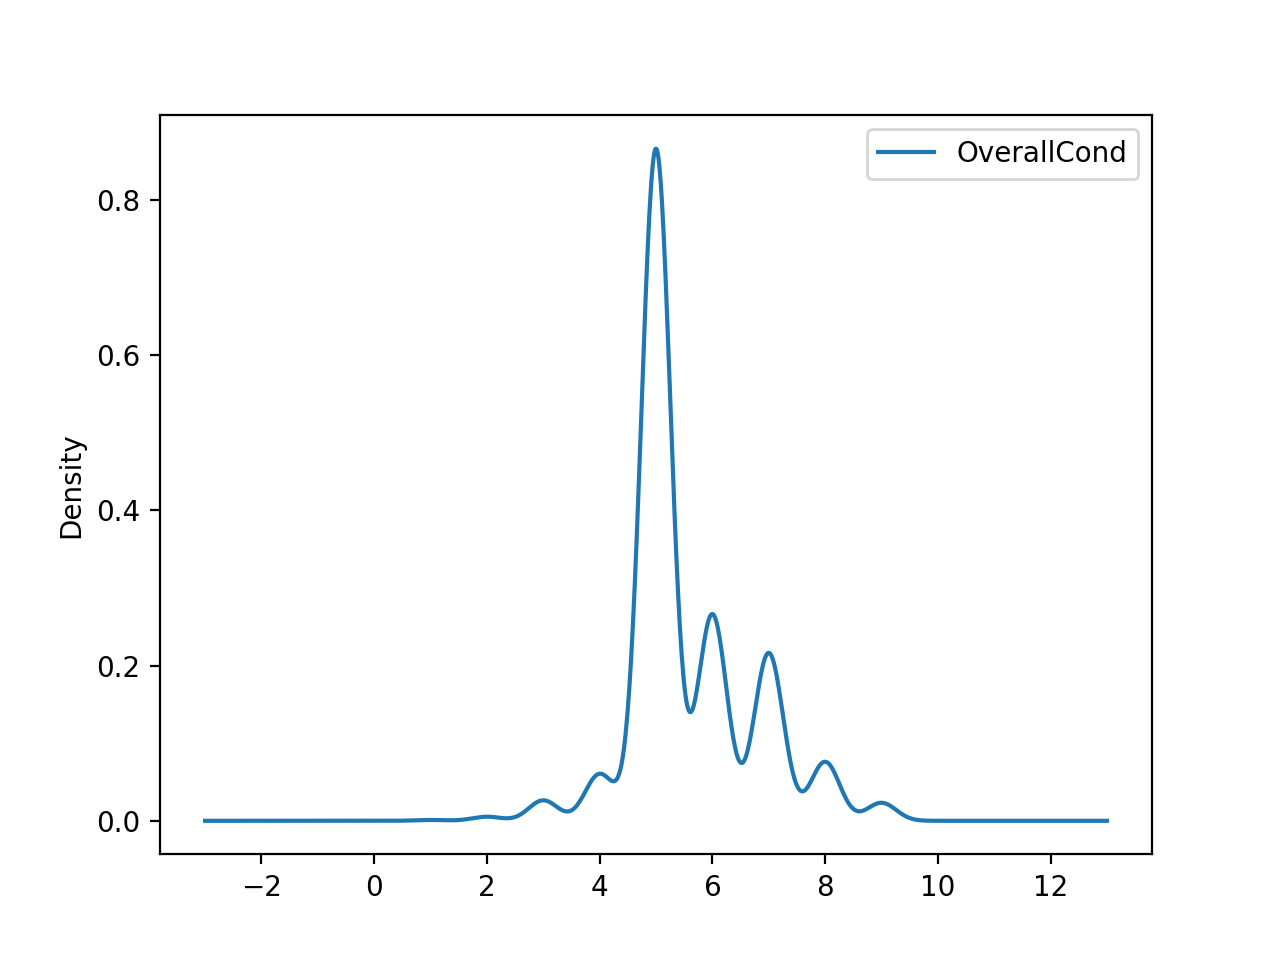

<AxesSubplot:ylabel='Density'>

In [10]:
# Create a plot that shows the Distribution of the overall house condition
cond = df[['OverallCond']]
#cond.plot.box() #since counts are obscured here, this plot is vague
#Let's do a kde instead.
cond.plot.kde()

<IPython.core.display.Javascript object>


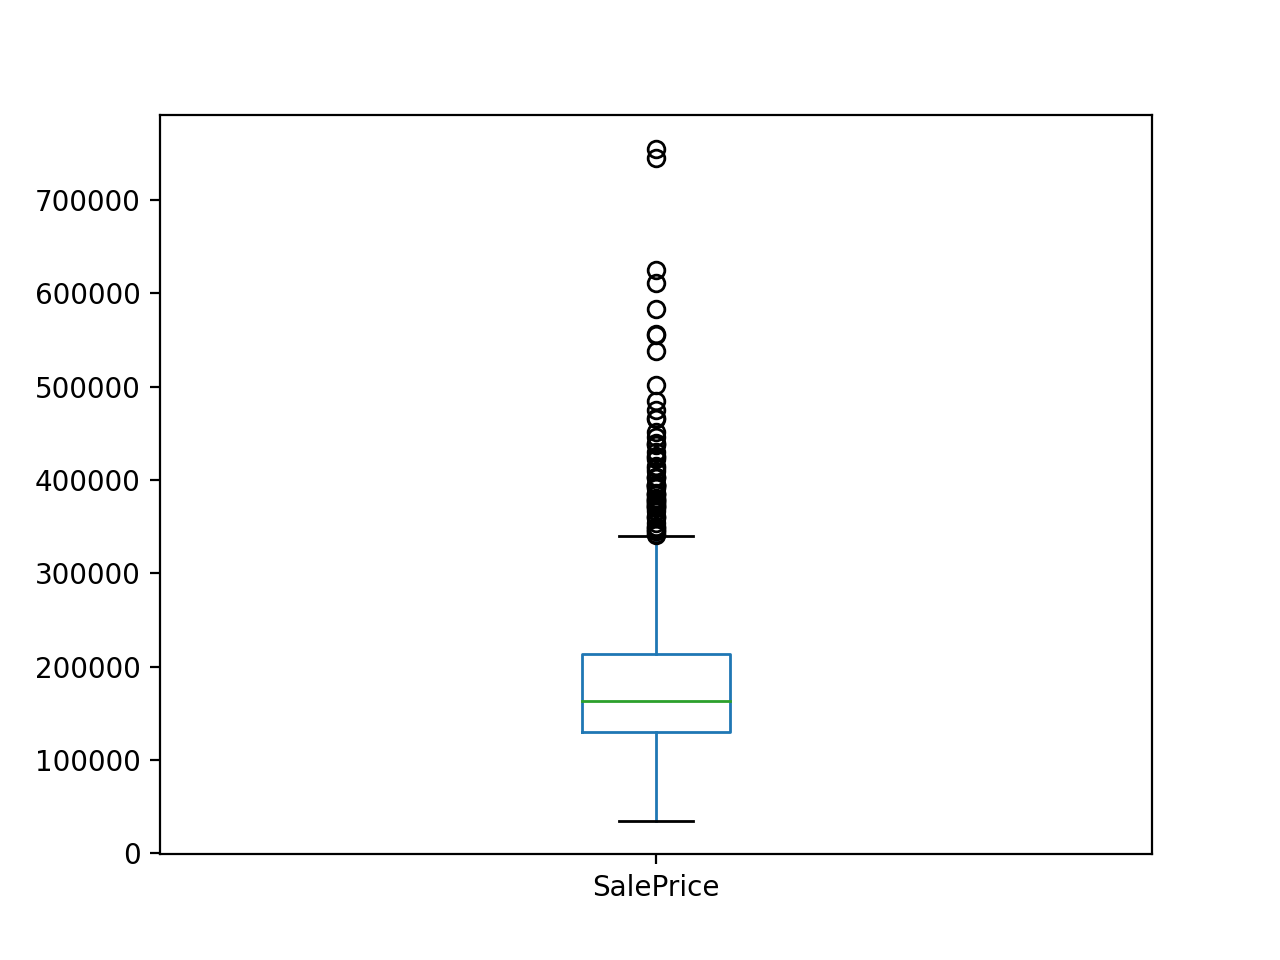

<AxesSubplot:>

In [21]:
# Create a Box Plot for SalePrice
sp = df[['SalePrice']]
sp.plot.box()

<IPython.core.display.Javascript object>


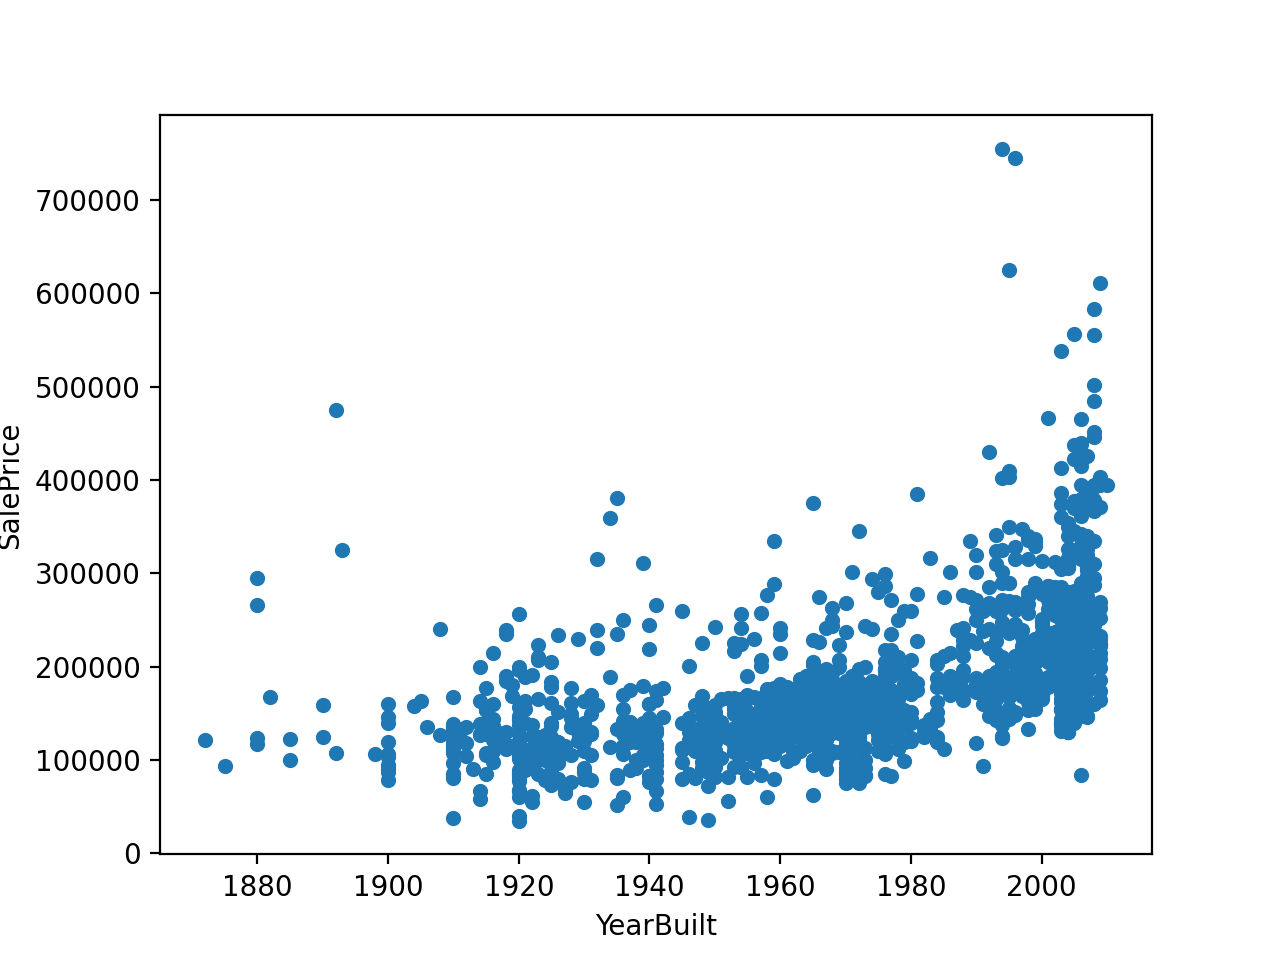

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

In [25]:
# Perform an Exploration of home values by age
val_age = df.loc[:,['SalePrice', 'YearBuilt']]
val_age.plot.scatter('YearBuilt', 'SalePrice')

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!